In [25]:

import numpy as np
import pandas as pd


def cleanData(data):
    data = data.dropna(subset=['score', 'user score', 'critics', 'users'])
    data['score']=pd.to_numeric(data['score'], errors ='coerce')
    data['user score']=pd.to_numeric(data['user score'], errors ='coerce').astype(np.float64)
    data['critics']=pd.to_numeric(data['critics'], errors ='coerce').astype(np.float64)
    data['users']=pd.to_numeric(data['users'], errors ='coerce').astype(np.float64)
    data = data.dropna(subset=['score', 'user score', 'critics', 'users'])
    data['score'] = data['score'] / 10.0
    return data

def load_data_csv(path,x_colum,y_colum):
    data = pd.read_csv(path)
    data = cleanData(data)
    X = data[x_colum].to_numpy()
    y = data[y_colum].to_numpy()
    return X, y

def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

def load_data_csv_multi(path,x1_colum,x2_colum,x3_colum,y_colum):
    data = pd.read_csv(path)
    data = cleanData(data)
    x1 = data[x1_colum].to_numpy()
    x2 = data[x2_colum].to_numpy()
    x3 = data[x3_colum].to_numpy()
    X = np.array([x1, x2, x3])
    X = X.T
    y = data[y_colum].to_numpy()
    X_norm, mu, sigma = zscore_normalize_features(X)
    return X_norm, y

    


In [29]:
## 0 Malo, 1 Regular, 2 Notable, 3 Sobresaliente, 4 Must Play.
## 0 Malo, 1 Bueno
def load_data_csv_multi_logistic(path,x1_colum,x2_colum,x3_colum,y_colum):
    X,y = load_data_csv_multi(path,x1_colum,x2_colum,x3_colum,y_colum)
    #TODO convertir la a clases 0,1.
    y_logistic = np.where(y >= 7, 1, 0)
    return X,y_logistic
        

In [30]:
load_data_csv_multi_logistic('data/games-data.csv', 'score', 'critics', 'users', 'user score')

(array([[ 2.2637034 , -0.1162566 ,  4.18946716],
        [ 2.18295864, -0.28842454,  0.3470819 ],
        [ 2.18295864,  2.29409459,  2.72616756],
        ...,
        [-4.35736681, -0.97709631, -0.04303091],
        [-4.43811157, -0.86231768,  0.29737641],
        [-4.84183537, -0.919707  , -0.02646241]]),
 array([1, 1, 1, ..., 0, 0, 0]))

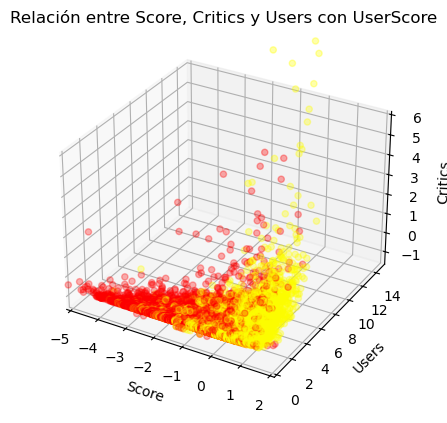

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, y_logistic = load_data_csv_multi_logistic('data/games-data.csv', 'score', 'critics', 'users', 'user score')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if label == 0 else 'yellow' for label in y_logistic]

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors)

ax.set_xlim(-5, 2)  
ax.set_ylim(0, 15)  
ax.set_zlim(-1.5, 6)  

ax.set_xlabel('Score')
ax.set_ylabel('Users')
ax.set_zlabel('Critics')
plt.title('Relación entre Score, Critics y Users con UserScore')

plt.show()